In [1]:
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
# from model import Net 
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm 
import torch.backends.cudnn as cudnn 
from torch.utils.data import Dataset,DataLoader



from utils import Draw,loader,Mis_predict
from model import Net
from main import Performance

In [4]:
trainloader,testloader = loader.load_data()

Files already downloaded and verified
Files already downloaded and verified


Plotting Test Images!
  cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck
3 images are plotted


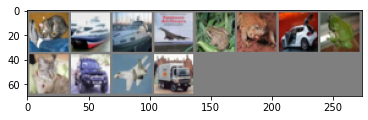

In [5]:
# get some random testing images
from colorama import Fore,Style

print(Style.BRIGHT+Fore.GREEN+'Plotting Test Images!')
dataiter = next(iter(testloader))
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
labels = dataiter[1]
image_set , labels = dataiter
idx = 12
print(' '.join('%5s' % classes[labels[j]] for j in range(idx)))
Draw.plotings(torchvision.utils.make_grid(image_set[:idx]))

Let us show some of the training images, for fun.



Plotting Train Images!
 deer   dog  deer  frog  frog  frog   car truck   dog  deer   dog  ship
3 images are plotted


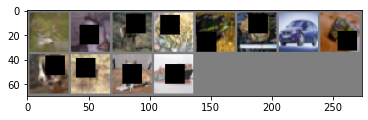

In [6]:

print(Style.BRIGHT+Fore.RED+'Plotting Train Images!')
# get some random training images
dataiter = next(iter(trainloader))
classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
labels = dataiter[1]
image_set , labels = dataiter
idx = 12
print(' '.join('%5s' % classes[labels[j]] for j in range(idx)))
# plt.imshow(image_set[4])
Draw.plotings(torchvision.utils.make_grid(image_set[:idx]))

In [7]:
# !pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(3, 32, 32))
print(device)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 32, 30, 30]           4,640
       BatchNorm2d-5           [-1, 32, 30, 30]              64
              ReLU-6           [-1, 32, 30, 30]               0
            Conv2d-7           [-1, 32, 28, 28]           9,248
       BatchNorm2d-8           [-1, 32, 28, 28]              64
              ReLU-9           [-1, 32, 28, 28]               0
           Conv2d-10          [-1, 128, 24, 24]          36,992
      BatchNorm2d-11          [-1, 128, 24, 24]             256
             ReLU-12          [-1, 128, 24, 24]               0
           Conv2d-13           [-1, 64, 22, 22]          73,792
      BatchNorm2d-14           [-1, 64,

In [8]:
# model =  Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 62
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    Performance().train(model, device, trainloader, optimizer, epoch)
    Performance().test(model, device, testloader)

EPOCH: 0


Loss=1.5999133586883545 Batch_id=390 train-Accuracy=32.79: 100%|██████████| 391/391 [00:22<00:00, 17.06it/s]



Test set: Average loss: 0.0121, val-Accuracy: 4405/10000 (44.05%)

EPOCH: 1


Loss=1.4994382858276367 Batch_id=390 train-Accuracy=43.36: 100%|██████████| 391/391 [00:20<00:00, 19.19it/s]



Test set: Average loss: 0.0109, val-Accuracy: 5048/10000 (50.48%)

EPOCH: 2


Loss=1.4746978282928467 Batch_id=390 train-Accuracy=48.63: 100%|██████████| 391/391 [00:22<00:00, 17.71it/s]



Test set: Average loss: 0.0095, val-Accuracy: 5762/10000 (57.62%)

EPOCH: 3


Loss=1.5041439533233643 Batch_id=390 train-Accuracy=52.24: 100%|██████████| 391/391 [00:21<00:00, 18.51it/s]



Test set: Average loss: 0.0091, val-Accuracy: 5978/10000 (59.78%)

EPOCH: 4


Loss=1.2803796529769897 Batch_id=390 train-Accuracy=54.98: 100%|██████████| 391/391 [00:19<00:00, 19.63it/s]



Test set: Average loss: 0.0081, val-Accuracy: 6350/10000 (63.50%)

EPOCH: 5


Loss=1.3496005535125732 Batch_id=390 train-Accuracy=57.04: 100%|██████████| 391/391 [00:20<00:00, 18.96it/s]



Test set: Average loss: 0.0079, val-Accuracy: 6501/10000 (65.01%)

EPOCH: 6


Loss=1.0065232515335083 Batch_id=390 train-Accuracy=58.97: 100%|██████████| 391/391 [00:22<00:00, 17.58it/s]



Test set: Average loss: 0.0072, val-Accuracy: 6710/10000 (67.10%)

EPOCH: 7


Loss=1.0910459756851196 Batch_id=390 train-Accuracy=60.26: 100%|██████████| 391/391 [00:19<00:00, 19.63it/s]



Test set: Average loss: 0.0071, val-Accuracy: 6811/10000 (68.11%)

EPOCH: 8


Loss=1.1212403774261475 Batch_id=390 train-Accuracy=61.76: 100%|██████████| 391/391 [00:19<00:00, 19.56it/s]



Test set: Average loss: 0.0075, val-Accuracy: 6791/10000 (67.91%)

EPOCH: 9


Loss=0.8285417556762695 Batch_id=390 train-Accuracy=63.09: 100%|██████████| 391/391 [00:21<00:00, 18.50it/s]



Test set: Average loss: 0.0065, val-Accuracy: 7094/10000 (70.94%)

EPOCH: 10


Loss=0.9611207246780396 Batch_id=390 train-Accuracy=63.68: 100%|██████████| 391/391 [00:20<00:00, 19.51it/s]



Test set: Average loss: 0.0060, val-Accuracy: 7385/10000 (73.85%)

EPOCH: 11


Loss=0.8462668657302856 Batch_id=390 train-Accuracy=64.48: 100%|██████████| 391/391 [00:19<00:00, 19.58it/s]



Test set: Average loss: 0.0058, val-Accuracy: 7388/10000 (73.88%)

EPOCH: 12


Loss=0.9769409894943237 Batch_id=390 train-Accuracy=65.58: 100%|██████████| 391/391 [00:20<00:00, 19.06it/s]



Test set: Average loss: 0.0065, val-Accuracy: 7087/10000 (70.87%)

EPOCH: 13


Loss=1.0913593769073486 Batch_id=390 train-Accuracy=66.04: 100%|██████████| 391/391 [00:21<00:00, 18.59it/s]



Test set: Average loss: 0.0062, val-Accuracy: 7326/10000 (73.26%)

EPOCH: 14


Loss=1.059754729270935 Batch_id=390 train-Accuracy=66.85: 100%|██████████| 391/391 [00:19<00:00, 19.58it/s]



Test set: Average loss: 0.0055, val-Accuracy: 7519/10000 (75.19%)

EPOCH: 15


Loss=0.9560176134109497 Batch_id=390 train-Accuracy=67.07: 100%|██████████| 391/391 [00:20<00:00, 19.54it/s]



Test set: Average loss: 0.0057, val-Accuracy: 7516/10000 (75.16%)

EPOCH: 16


Loss=1.023894190788269 Batch_id=390 train-Accuracy=67.61: 100%|██████████| 391/391 [00:20<00:00, 18.97it/s]



Test set: Average loss: 0.0055, val-Accuracy: 7572/10000 (75.72%)

EPOCH: 17


Loss=0.9888195991516113 Batch_id=390 train-Accuracy=68.32: 100%|██████████| 391/391 [00:20<00:00, 19.52it/s]



Test set: Average loss: 0.0054, val-Accuracy: 7662/10000 (76.62%)

EPOCH: 18


Loss=0.7333019971847534 Batch_id=390 train-Accuracy=68.67: 100%|██████████| 391/391 [00:19<00:00, 19.66it/s]



Test set: Average loss: 0.0052, val-Accuracy: 7735/10000 (77.35%)

EPOCH: 19


Loss=0.9341318011283875 Batch_id=390 train-Accuracy=69.01: 100%|██████████| 391/391 [00:20<00:00, 19.14it/s]



Test set: Average loss: 0.0050, val-Accuracy: 7845/10000 (78.45%)

EPOCH: 20


Loss=0.9529927372932434 Batch_id=390 train-Accuracy=70.08: 100%|██████████| 391/391 [00:20<00:00, 19.24it/s]



Test set: Average loss: 0.0051, val-Accuracy: 7771/10000 (77.71%)

EPOCH: 21


Loss=0.7361847162246704 Batch_id=390 train-Accuracy=70.04: 100%|██████████| 391/391 [00:19<00:00, 19.58it/s]



Test set: Average loss: 0.0050, val-Accuracy: 7792/10000 (77.92%)

EPOCH: 22


Loss=0.9320123791694641 Batch_id=390 train-Accuracy=70.42: 100%|██████████| 391/391 [00:20<00:00, 19.28it/s]



Test set: Average loss: 0.0048, val-Accuracy: 7881/10000 (78.81%)

EPOCH: 23


Loss=0.8472269773483276 Batch_id=390 train-Accuracy=70.56: 100%|██████████| 391/391 [00:21<00:00, 18.16it/s]



Test set: Average loss: 0.0048, val-Accuracy: 7889/10000 (78.89%)

EPOCH: 24


Loss=0.8165978193283081 Batch_id=390 train-Accuracy=71.34: 100%|██████████| 391/391 [00:19<00:00, 19.58it/s]



Test set: Average loss: 0.0049, val-Accuracy: 7875/10000 (78.75%)

EPOCH: 25


Loss=0.8268260955810547 Batch_id=390 train-Accuracy=71.47: 100%|██████████| 391/391 [00:20<00:00, 19.45it/s]



Test set: Average loss: 0.0051, val-Accuracy: 7786/10000 (77.86%)

EPOCH: 26


Loss=0.6611761450767517 Batch_id=390 train-Accuracy=71.34: 100%|██████████| 391/391 [00:20<00:00, 19.03it/s]



Test set: Average loss: 0.0048, val-Accuracy: 7899/10000 (78.99%)

EPOCH: 27


Loss=0.8775852918624878 Batch_id=390 train-Accuracy=71.88: 100%|██████████| 391/391 [00:19<00:00, 19.65it/s]



Test set: Average loss: 0.0046, val-Accuracy: 8007/10000 (80.07%)

EPOCH: 28


Loss=0.6394456028938293 Batch_id=390 train-Accuracy=72.26: 100%|██████████| 391/391 [00:19<00:00, 19.69it/s]



Test set: Average loss: 0.0047, val-Accuracy: 7996/10000 (79.96%)

EPOCH: 29


Loss=0.8356808423995972 Batch_id=390 train-Accuracy=72.61: 100%|██████████| 391/391 [00:20<00:00, 19.02it/s]



Test set: Average loss: 0.0045, val-Accuracy: 8024/10000 (80.24%)

EPOCH: 30


Loss=0.6099821329116821 Batch_id=390 train-Accuracy=72.41: 100%|██████████| 391/391 [00:20<00:00, 19.26it/s]



Test set: Average loss: 0.0043, val-Accuracy: 8093/10000 (80.93%)

EPOCH: 31


Loss=0.6208670139312744 Batch_id=390 train-Accuracy=73.20: 100%|██████████| 391/391 [00:19<00:00, 19.61it/s]



Test set: Average loss: 0.0043, val-Accuracy: 8118/10000 (81.18%)

EPOCH: 32


Loss=0.9300312995910645 Batch_id=390 train-Accuracy=73.39: 100%|██████████| 391/391 [00:20<00:00, 19.33it/s]



Test set: Average loss: 0.0046, val-Accuracy: 8030/10000 (80.30%)

EPOCH: 33


Loss=0.8566862940788269 Batch_id=390 train-Accuracy=73.38: 100%|██████████| 391/391 [00:20<00:00, 18.82it/s]



Test set: Average loss: 0.0042, val-Accuracy: 8161/10000 (81.61%)

EPOCH: 34


Loss=0.9387249946594238 Batch_id=390 train-Accuracy=73.39: 100%|██████████| 391/391 [00:20<00:00, 19.51it/s]



Test set: Average loss: 0.0043, val-Accuracy: 8100/10000 (81.00%)

EPOCH: 35


Loss=0.682403028011322 Batch_id=390 train-Accuracy=73.77: 100%|██████████| 391/391 [00:20<00:00, 19.44it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8084/10000 (80.84%)

EPOCH: 36


Loss=0.6975890398025513 Batch_id=390 train-Accuracy=74.11: 100%|██████████| 391/391 [00:20<00:00, 18.99it/s]



Test set: Average loss: 0.0041, val-Accuracy: 8216/10000 (82.16%)

EPOCH: 37


Loss=0.9060932993888855 Batch_id=390 train-Accuracy=74.17: 100%|██████████| 391/391 [00:20<00:00, 19.29it/s]



Test set: Average loss: 0.0043, val-Accuracy: 8095/10000 (80.95%)

EPOCH: 38


Loss=0.5762945413589478 Batch_id=390 train-Accuracy=74.30: 100%|██████████| 391/391 [00:20<00:00, 19.51it/s]



Test set: Average loss: 0.0042, val-Accuracy: 8189/10000 (81.89%)

EPOCH: 39


Loss=0.750703752040863 Batch_id=390 train-Accuracy=74.42: 100%|██████████| 391/391 [00:20<00:00, 19.01it/s]



Test set: Average loss: 0.0042, val-Accuracy: 8168/10000 (81.68%)

EPOCH: 40


Loss=0.7355915904045105 Batch_id=390 train-Accuracy=74.46: 100%|██████████| 391/391 [00:20<00:00, 19.04it/s]



Test set: Average loss: 0.0040, val-Accuracy: 8229/10000 (82.29%)

EPOCH: 41


Loss=0.7064879536628723 Batch_id=390 train-Accuracy=74.67: 100%|██████████| 391/391 [00:19<00:00, 19.68it/s]



Test set: Average loss: 0.0042, val-Accuracy: 8158/10000 (81.58%)

EPOCH: 42


Loss=0.8403376340866089 Batch_id=390 train-Accuracy=74.89: 100%|██████████| 391/391 [00:20<00:00, 19.47it/s]



Test set: Average loss: 0.0041, val-Accuracy: 8206/10000 (82.06%)

EPOCH: 43


Loss=0.7820894122123718 Batch_id=390 train-Accuracy=74.95: 100%|██████████| 391/391 [00:20<00:00, 18.72it/s]



Test set: Average loss: 0.0044, val-Accuracy: 8116/10000 (81.16%)

EPOCH: 44


Loss=0.6598761677742004 Batch_id=390 train-Accuracy=75.28: 100%|██████████| 391/391 [00:19<00:00, 19.58it/s]



Test set: Average loss: 0.0039, val-Accuracy: 8315/10000 (83.15%)

EPOCH: 45


Loss=0.6560662984848022 Batch_id=390 train-Accuracy=75.25: 100%|██████████| 391/391 [00:20<00:00, 19.49it/s]



Test set: Average loss: 0.0042, val-Accuracy: 8193/10000 (81.93%)

EPOCH: 46


Loss=0.5103409886360168 Batch_id=390 train-Accuracy=75.47: 100%|██████████| 391/391 [00:20<00:00, 18.95it/s]



Test set: Average loss: 0.0041, val-Accuracy: 8257/10000 (82.57%)

EPOCH: 47


Loss=0.6176371574401855 Batch_id=390 train-Accuracy=75.58: 100%|██████████| 391/391 [00:20<00:00, 19.16it/s]



Test set: Average loss: 0.0040, val-Accuracy: 8231/10000 (82.31%)

EPOCH: 48


Loss=0.8733851313591003 Batch_id=390 train-Accuracy=75.58: 100%|██████████| 391/391 [00:20<00:00, 19.49it/s]



Test set: Average loss: 0.0038, val-Accuracy: 8338/10000 (83.38%)

EPOCH: 49


Loss=0.5627992749214172 Batch_id=390 train-Accuracy=76.01: 100%|██████████| 391/391 [00:20<00:00, 19.21it/s]



Test set: Average loss: 0.0039, val-Accuracy: 8290/10000 (82.90%)

EPOCH: 50


Loss=0.5547343492507935 Batch_id=390 train-Accuracy=76.18: 100%|██████████| 391/391 [00:20<00:00, 18.77it/s]



Test set: Average loss: 0.0039, val-Accuracy: 8312/10000 (83.12%)

EPOCH: 51


Loss=0.6599343419075012 Batch_id=390 train-Accuracy=76.22: 100%|██████████| 391/391 [00:20<00:00, 19.43it/s]



Test set: Average loss: 0.0041, val-Accuracy: 8239/10000 (82.39%)

EPOCH: 52


Loss=0.686343252658844 Batch_id=390 train-Accuracy=76.20: 100%|██████████| 391/391 [00:20<00:00, 19.48it/s]



Test set: Average loss: 0.0039, val-Accuracy: 8292/10000 (82.92%)

EPOCH: 53


Loss=0.8062971830368042 Batch_id=390 train-Accuracy=76.20: 100%|██████████| 391/391 [00:20<00:00, 18.67it/s]



Test set: Average loss: 0.0038, val-Accuracy: 8365/10000 (83.65%)

EPOCH: 54


Loss=0.7782368659973145 Batch_id=390 train-Accuracy=76.60: 100%|██████████| 391/391 [00:20<00:00, 18.90it/s]



Test set: Average loss: 0.0039, val-Accuracy: 8299/10000 (82.99%)

EPOCH: 55


Loss=0.9798615574836731 Batch_id=390 train-Accuracy=76.23: 100%|██████████| 391/391 [00:19<00:00, 19.60it/s]



Test set: Average loss: 0.0039, val-Accuracy: 8345/10000 (83.45%)

EPOCH: 56


Loss=0.7305905222892761 Batch_id=390 train-Accuracy=76.65: 100%|██████████| 391/391 [00:20<00:00, 19.30it/s]



Test set: Average loss: 0.0040, val-Accuracy: 8306/10000 (83.06%)

EPOCH: 57


Loss=0.7368828654289246 Batch_id=390 train-Accuracy=76.79: 100%|██████████| 391/391 [00:20<00:00, 18.93it/s]



Test set: Average loss: 0.0042, val-Accuracy: 8148/10000 (81.48%)

EPOCH: 58


Loss=0.6362294554710388 Batch_id=390 train-Accuracy=76.80: 100%|██████████| 391/391 [00:20<00:00, 19.35it/s]



Test set: Average loss: 0.0037, val-Accuracy: 8423/10000 (84.23%)

EPOCH: 59


Loss=0.6277655959129333 Batch_id=390 train-Accuracy=76.77: 100%|██████████| 391/391 [00:20<00:00, 19.46it/s]



Test set: Average loss: 0.0037, val-Accuracy: 8387/10000 (83.87%)

EPOCH: 60


Loss=0.6395444869995117 Batch_id=390 train-Accuracy=77.05: 100%|██████████| 391/391 [00:20<00:00, 18.80it/s]



Test set: Average loss: 0.0039, val-Accuracy: 8337/10000 (83.37%)

EPOCH: 61


Loss=0.7451938390731812 Batch_id=390 train-Accuracy=77.24: 100%|██████████| 391/391 [00:20<00:00, 19.05it/s]



Test set: Average loss: 0.0038, val-Accuracy: 8363/10000 (83.63%)



In [12]:
train_acc,train_losses = Performance().scores()[:2]
test_acc,test_losses = Performance().scores()[2:]
print(test_acc)

[]


Text(0.5, 1.0, 'Test Accuracy')

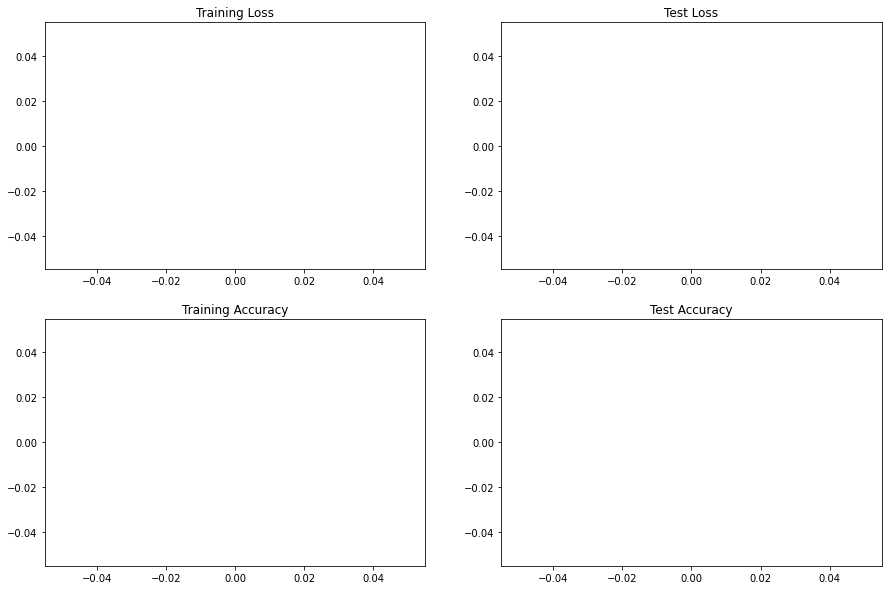

In [11]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot([t.cpu().item() for t in train_losses])
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [14]:
mis_prediction_scores = Mis_predict.rate(testloader,model,classes)

In [16]:
for label,acc in mis_prediction_scores.items():
  print(label,":",round(acc,2))

plane : 93.1
car : 96.43
bird : 63.64
cat : 79.41
deer : 70.37
dog : 66.67
frog : 91.67
horse : 88.0
ship : 93.75
truck : 87.18
